# Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from scipy.special import expit

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

# ML Evaluation/Metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix

# Loads Data

In [3]:
df = pd.read_csv(r"League_Result_Data/TimeEncoded_PremierLeague_Stats_From_2014to2021.csv")

In [4]:
df

,Unnamed: 0,Season,Season Encoding,Date,YearOfSeason,Time,Time Encoding,HomeTeam,HomeTeam Encoding,AwayTeam,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,Fall,0,12/09/2020,2020/21,Afternoon,0,Fulham,8,Arsenal,...,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,1,Fall,0,12/09/2020,2020/21,Late-Day,2,Crystal Palace,6,Southampton,...,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,2,Fall,0,12/09/2020,2020/21,Late-Day,2,Liverpool,13,Leeds,...,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,3,Fall,0,12/09/2020,2020/21,Late-Day,2,West Ham,28,Newcastle,...,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,4,Fall,0,13/09/2020,2020/21,Mid-Day,1,West Brom,27,Leicester,...,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,665,Summer,3,26/07/2020,2019/20,Mid-Day,1,Leicester,12,Man United,...,3.0,3.0,12.0,11.0,3.0,3.0,1.0,4.0,1.0,0.0
666,666,Summer,3,26/07/2020,2019/20,Mid-Day,1,Man City,14,Norwich,...,10.0,4.0,7.0,4.0,9.0,0.0,1.0,1.0,0.0,0.0
667,667,Summer,3,26/07/2020,2019/20,Mid-Day,1,Newcastle,17,Liverpool,...,2.0,6.0,11.0,5.0,2.0,4.0,1.0,0.0,0.0,0.0
668,668,Summer,3,26/07/2020,2019/20,Mid-Day,1,Southampton,21,Sheffield United,...,4.0,3.0,9.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0


In [5]:
# Had this column get created upon loading, just dropped it
df = df.drop(columns=["Unnamed: 0"]) 
df

,Season,Season Encoding,Date,YearOfSeason,Time,Time Encoding,HomeTeam,HomeTeam Encoding,AwayTeam,AwayTeam Encoding,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Fall,0,12/09/2020,2020/21,Afternoon,0,Fulham,8,Arsenal,0,...,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,Fall,0,12/09/2020,2020/21,Late-Day,2,Crystal Palace,6,Southampton,21,...,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,Fall,0,12/09/2020,2020/21,Late-Day,2,Liverpool,13,Leeds,11,...,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,Fall,0,12/09/2020,2020/21,Late-Day,2,West Ham,28,Newcastle,17,...,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,Fall,0,13/09/2020,2020/21,Mid-Day,1,West Brom,27,Leicester,12,...,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Summer,3,26/07/2020,2019/20,Mid-Day,1,Leicester,12,Man United,15,...,3.0,3.0,12.0,11.0,3.0,3.0,1.0,4.0,1.0,0.0
666,Summer,3,26/07/2020,2019/20,Mid-Day,1,Man City,14,Norwich,18,...,10.0,4.0,7.0,4.0,9.0,0.0,1.0,1.0,0.0,0.0
667,Summer,3,26/07/2020,2019/20,Mid-Day,1,Newcastle,17,Liverpool,13,...,2.0,6.0,11.0,5.0,2.0,4.0,1.0,0.0,0.0,0.0
668,Summer,3,26/07/2020,2019/20,Mid-Day,1,Southampton,21,Sheffield United,20,...,4.0,3.0,9.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0


# Encodes Year of Season

In [6]:
df = df.dropna()

seasons = set(df['YearOfSeason'].values)
seasons = list(seasons)

# re-orders the list 
seasons = ['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21']
seasons

['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21']

In [7]:
df['YearOfSeason Encoding'] = -1

for index, value in df['YearOfSeason'].iteritems():
    
    # 2014/15: 0
    if value == seasons[0]:
        df.at[index, 'YearOfSeason Encoding'] = 0
    
    # 2015/16: 1
    if value == seasons[1]:
        df.at[index, 'YearOfSeason Encoding'] = 1
        
    # 2016/17: 2
    if value == seasons[2]:
        df.at[index, 'YearOfSeason Encoding'] = 2
    
    # 2017/18: 3
    if value == seasons[3]:
        df.at[index, 'YearOfSeason Encoding'] = 3
        
    # 2018/19: 4
    if value == seasons[4]:
        df.at[index, 'YearOfSeason Encoding'] = 4
        
    # 2019/20: 5
    if value == seasons[5]:
        df.at[index, 'YearOfSeason Encoding'] = 5
    
    # 2020/21: 6
    if value == seasons[6]:
        df.at[index, 'YearOfSeason Encoding'] = 6 
        
df

<ipython-input-7-b97e69801d13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearOfSeason Encoding'] = -1


,Season,Season Encoding,Date,YearOfSeason,Time,Time Encoding,HomeTeam,HomeTeam Encoding,AwayTeam,AwayTeam Encoding,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,YearOfSeason Encoding
0,Fall,0,12/09/2020,2020/21,Afternoon,0,Fulham,8,Arsenal,0,...,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6
1,Fall,0,12/09/2020,2020/21,Late-Day,2,Crystal Palace,6,Southampton,21,...,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,6
2,Fall,0,12/09/2020,2020/21,Late-Day,2,Liverpool,13,Leeds,11,...,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,6
3,Fall,0,12/09/2020,2020/21,Late-Day,2,West Ham,28,Newcastle,17,...,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,6
4,Fall,0,13/09/2020,2020/21,Mid-Day,1,West Brom,27,Leicester,12,...,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Summer,3,26/07/2020,2019/20,Mid-Day,1,Leicester,12,Man United,15,...,3.0,12.0,11.0,3.0,3.0,1.0,4.0,1.0,0.0,5
666,Summer,3,26/07/2020,2019/20,Mid-Day,1,Man City,14,Norwich,18,...,4.0,7.0,4.0,9.0,0.0,1.0,1.0,0.0,0.0,5
667,Summer,3,26/07/2020,2019/20,Mid-Day,1,Newcastle,17,Liverpool,13,...,6.0,11.0,5.0,2.0,4.0,1.0,0.0,0.0,0.0,5
668,Summer,3,26/07/2020,2019/20,Mid-Day,1,Southampton,21,Sheffield United,20,...,3.0,9.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0,5


# Split the Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 0 to 669
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 632 non-null    object 
 1   Season Encoding        632 non-null    int64  
 2   Date                   632 non-null    object 
 3   YearOfSeason           632 non-null    object 
 4   Time                   632 non-null    object 
 5   Time Encoding          632 non-null    int64  
 6   HomeTeam               632 non-null    object 
 7   HomeTeam Encoding      632 non-null    int64  
 8   AwayTeam               632 non-null    object 
 9   AwayTeam Encoding      632 non-null    int64  
 10  FTHG                   632 non-null    float64
 11  FTAG                   632 non-null    float64
 12  FTR                    632 non-null    object 
 13  FTR Encoding           632 non-null    int64  
 14  HTHG                   632 non-null    float64
 15  HTAG  

In [9]:
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["Season", "YearOfSeason", "Date", "Time", "FTHG","FTAG", "HTHG","HTAG" ,"HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])
# Labels
y = df["FTR Encoding"]

In [10]:
X

,Season Encoding,Time Encoding,HomeTeam Encoding,AwayTeam Encoding,Referee Encoding,Fouls Called Per Game,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,YearOfSeason Encoding
0,0,0,8,0,7,14.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6
1,0,2,6,21,27,14.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,6
2,0,2,13,11,28,14.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,6
3,0,2,28,17,11,13.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,6
4,0,1,27,12,10,15.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,3,1,12,15,16,14.0,14.0,7.0,3.0,3.0,12.0,11.0,3.0,3.0,1.0,4.0,1.0,0.0,5
666,3,1,14,18,25,15.0,31.0,5.0,10.0,4.0,7.0,4.0,9.0,0.0,1.0,1.0,0.0,0.0,5
667,3,1,17,13,10,15.0,3.0,14.0,2.0,6.0,11.0,5.0,2.0,4.0,1.0,0.0,0.0,0.0,5
668,3,1,21,20,3,13.0,13.0,5.0,4.0,3.0,9.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0,5


In [11]:
y

0      1
1      0
2      0
3      1
4      1
      ..
665    1
666    0
667    1
668    0
669    2
Name: FTR Encoding, Length: 632, dtype: int64

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scale Features

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Logistic Regression & Evaluation

In [21]:
log_clf = LogisticRegression(random_state=42, penalty='l1', solver='saga', 
                             multi_class='ovr',tol=1e-3)
log_clf = log_clf.fit(X_train, y_train)

score = log_clf.score(X_test, y_test)

print(score)

0.6377952755905512


In [22]:
results = log_clf.predict(X_test)
results

array([1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0], dtype=int64)

# Confusion Matrix

In [58]:
#cm = confusion_matrix(y, log_clf.predict(X))

# 27 bc (3)^3 = 27 (was 8,8 which is (2)^3 for 2 outcomes; so I followed a similar scale for 3 outcomes)
#ax.imshow(cm)
#fig, ax = plt.subplots(figsize=(9, 9)) 

#ax.grid(False)

#ax.xaxis.set(ticks=(0, 2), ticklabels=('Predicted Home-Wins', 'Predicted Away-Wins', 'Predicted Draws'))
#ax.yaxis.set(ticks=(0, 2), ticklabels=('Actual Home-Wins', 'Actual Away-Wins', 'Actual Draws'))

#plt.show()

Confusion matrix, without normalization
[[45 10  2]
 [ 5 31  1]
 [13 15  5]]


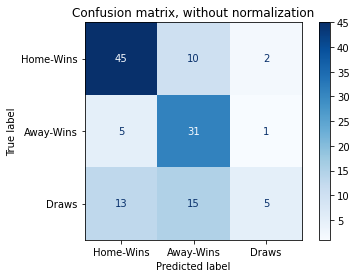

Normalized confusion matrix
[[0.78947368 0.1754386  0.03508772]
 [0.13513514 0.83783784 0.02702703]
 [0.39393939 0.45454545 0.15151515]]


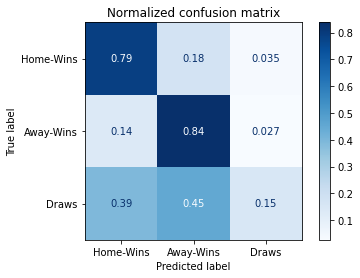

In [44]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names=['Home-Wins', 'Away-Wins', 'Draws']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

### Precision Recall FMeasure & Support scores

In [49]:
p_r_f = precision_recall_fscore_support(y_test, results, average='macro')
p_r_f

(0.6309523809523809, 0.592942224521172, 0.5535230352303523, None)

In [50]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       210
           1       0.60      0.71      0.65       177
           2       0.38      0.16      0.23       118

    accuracy                           0.59       505
   macro avg       0.53      0.53      0.52       505
weighted avg       0.56      0.59      0.56       505



### FPR & TPR Rates

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, results, pos_label=2)

In [52]:
fpr

array([0.        , 0.03191489, 0.46808511, 1.        ])

In [53]:
tpr

array([0.        , 0.15151515, 0.60606061, 1.        ])

In [54]:
thresholds

array([3, 2, 1, 0], dtype=int64)

### ROC Curve

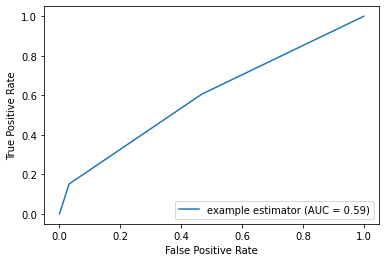

In [55]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
display.plot()  
plt.show()     